# Importing Libreries


In [564]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pip install pandas
import seaborn as sns
from prettytable import PrettyTable
from random import randint

In [565]:
%matplotlib inline

### Reading the dataset

In [566]:
df = pd.read_csv('prices.csv')

#### Droping null values and printing first 5 rows

In [567]:
df=df.dropna()
df.head()

,date,symbol,open,close,low,high,volume
0,1/5/2016 0:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,1/6/2016 0:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,1/7/2016 0:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,1/8/2016 0:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,1/11/2016 0:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [568]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 52.0+ MB


### Some stats about the dataset

In [569]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [570]:
#Column of the dataset
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

#### Some graphs about all field in relation to other fields

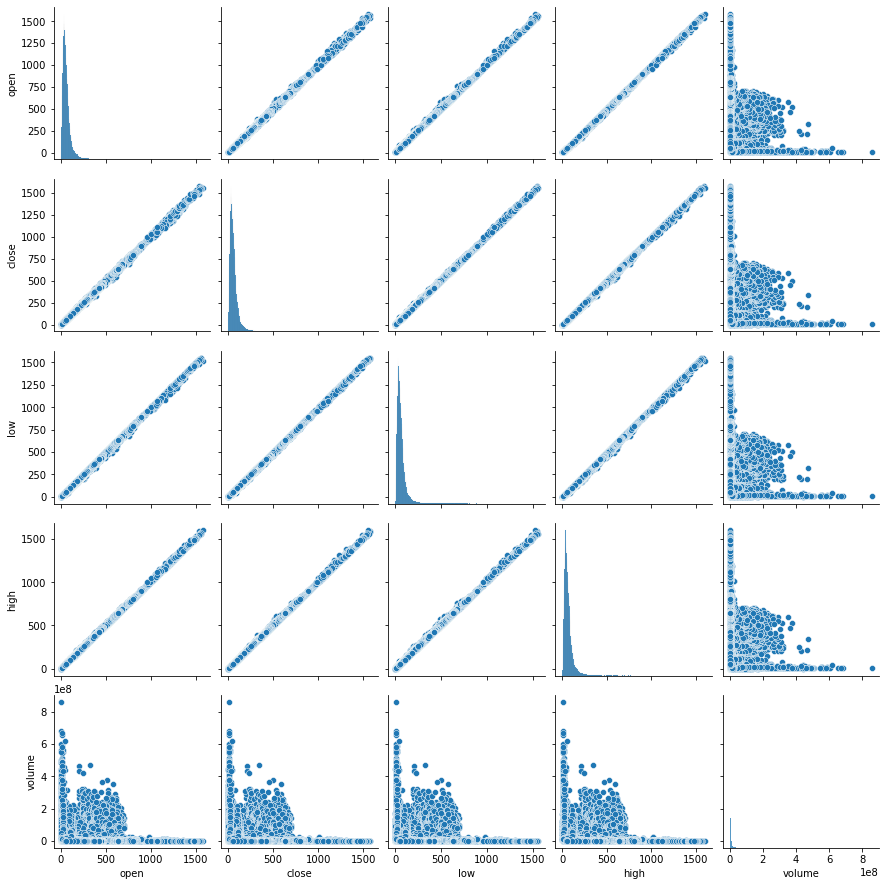

In [571]:
sns.pairplot(df)

Heatmap

<AxesSubplot:>

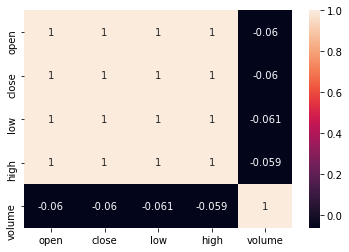

In [572]:
sns.heatmap(df.corr(),annot=True)

In [573]:
#slected any stock for whom you want the precdiction
ticker = df['symbol'].unique() 
t = PrettyTable(['Ticker'])
for i in range(len(ticker)):
    t.add_row([ticker[i]])
print(t)

+--------+
| Ticker |
+--------+
|  WLTW  |
|   A    |
|  AAL   |
|  AAP   |
|  AAPL  |
|  ABC   |
|  ABT   |
|  ACN   |
|  ADBE  |
|  ADI   |
|  ADM   |
|  ADP   |
|  ADS   |
|  ADSK  |
|  AEE   |
|  AEP   |
|  AES   |
|  AET   |
|  AFL   |
|  AGN   |
|  AIG   |
|  AIZ   |
|  AJG   |
|  AKAM  |
|  ALB   |
|  ALK   |
|  ALL   |
|  ALXN  |
|  AMAT  |
|  AME   |
|  AMG   |
|  AMGN  |
|  AMP   |
|  AMT   |
|  AMZN  |
|   AN   |
|  ANTM  |
|  AON   |
|  APA   |
|  APC   |
|  APD   |
|  APH   |
|  ARNC  |
|  ATVI  |
|  AVB   |
|  AVGO  |
|  AVY   |
|  AWK   |
|  AXP   |
|  AYI   |
|  AZO   |
|   BA   |
|  BAC   |
|  BAX   |
|  BBBY  |
|  BBT   |
|  BBY   |
|  BCR   |
|  BDX   |
|  BEN   |
|  BHI   |
|  BIIB  |
|   BK   |
|  BLK   |
|  BLL   |
|  BMY   |
|  BSX   |
|  BWA   |
|  BXP   |
|   C    |
|   CA   |
|  CAG   |
|  CAH   |
|  CAT   |
|   CB   |
|  CBG   |
|  CBS   |
|  CCI   |
|  CCL   |
|  CELG  |
|  CERN  |
|   CF   |
|  CHD   |
|  CHK   |
|  CHRW  |
|   CI   |
|  CINF  |
|   CL   |

In [574]:
selected_symbol = input('Please enter the ticker from table above: ').upper()
while selected_symbol not in ticker:
    selected_symbol = input('Please enter the valid ticker from above table: ').upper()
print(f"{selected_symbol} is selected.")


Please enter the ticker from table above: DHI
DHI is selected.


Selecting rows for the stock ticker selected


In [575]:
df = df.loc[df['symbol']== selected_symbol]
df.drop(['symbol','open','low','high','volume'],inplace=True,axis=1)

C:\Users\19732\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [576]:
df.head()

,date,close
372,1/4/2010,11.16
840,1/5/2010,11.56
1308,1/6/2010,11.66
1776,1/7/2010,12.27
2244,1/8/2010,12.17


##### Selcting the closing price of the selected stock

In [577]:
x_data = df['close']

#### Adding noise to the data

In [578]:
noise = np.random.randn(len(x_data))

#### Cost Function
######  y = mx + b

In [606]:
b = 5
m =0.5
y_true = (0.5*x_data)+5+noise #original y

##### Concatinating X data and y_true

In [607]:
df1 = pd.DataFrame({'X Data': x_data})
df2 = pd.DataFrame({'Y': y_true})
my_data=pd.concat([df1, df2],axis = 1)
my_data.head()

,X Data,Y
372,11.16,11.292618
840,11.56,10.771442
1308,11.66,10.784454
1776,12.27,11.452975
2244,12.17,11.242111


##### Ploting scatter graph of x_data vs original cost function

<AxesSubplot:xlabel='X Data', ylabel='Y'>

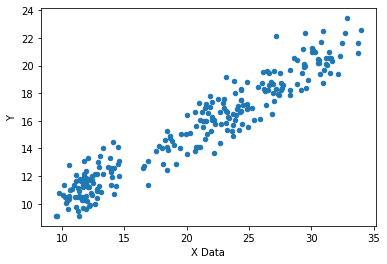

In [608]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# Tensorflow

In [582]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

##### Batch size

In [583]:
# Random 10 points to grab
batch_size = 8

** Variables **

In [584]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

** Placeholders **

In [585]:
xph = tf.placeholder(tf.float32,[batch_size])

In [586]:
yph = tf.placeholder(tf.float32,[batch_size])

** Our graph **

In [609]:
y_model = m*xph + b # y for trainging the model

** Loss Function **

In [588]:
error = tf.reduce_mean(tf.square(yph-y_model))


** Optimizer **

In [601]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(error)

** Initial Variables **


In [590]:
init = tf.global_variables_initializer()

** Array of indices of x_data **

In [602]:
x_data_index = x_data.index

## Session

In [592]:

with tf.Session() as sess:
    sess.run(init)
    batches = 100
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data_index),size=batch_size)
        feed = {xph:x_data[x_data_index[rand_ind]],yph:y_true[x_data_index[rand_ind]]}
        sess.run(train,feed_dict=feed)
    model_m,model_b = sess.run([m,b])

In [593]:
model_m

0.6755759

In [594]:
model_b

1.0165278

### Results

In [610]:
y_hat = x_data * model_m + model_b #predicted Y

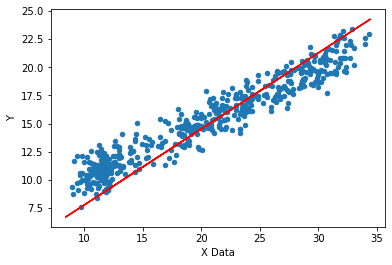

In [612]:
my_data.sample(n=500).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [613]:
df1 = pd.DataFrame({'Y Original': y_true})
df2 = pd.DataFrame({'Y Predicted': y_hat})
my_data=pd.concat([df1, df2],axis = 1)
my_data

,Y Original,Y Predicted
372,11.292618,8.555955
840,10.771442,8.826185
1308,10.784454,8.893743
1776,11.452975,9.305844
2244,11.242111,9.238287
...,...,...
848891,19.523108,19.635399
849391,21.249561,19.885363
849891,19.370489,19.669179
850391,19.528874,19.615133
